# 🔥 Important Concepts in Classification (Complete Guide)

This notebook explains:

- Decision Boundary  
- Probability Output  
- Threshold  
- Evaluation Metrics  
- Overfitting & Underfitting  
- Regularization (L1 & L2)  

Each section includes explanations, diagrams, and Python code examples.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc, log_loss
)
import seaborn as sns
sns.set()


# ✔ Decision Boundary

A decision boundary is the **line or surface** that separates different classes in a classification problem.

- In 2D → It's a line or curve.
- In 3D → It's a plane or curved surface.
- For higher dimensions → Hard to visualize.

The classifier decides **which class** a point belongs to by looking at **which side** of the boundary it lies on.

### Example:
For two classes:

If the model learns this rule:
`3x + 2y - 5 = 0`

- If `3x + 2y - 5 > 0` → Class 1  
- If `3x + 2y - 5 < 0` → Class 0


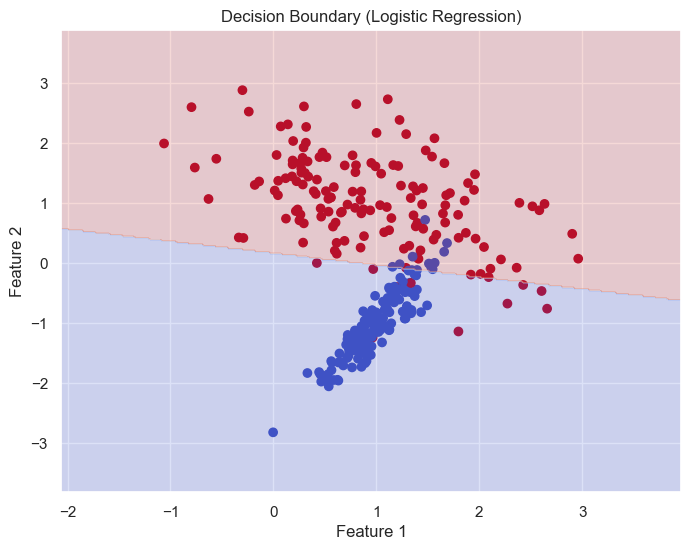

In [ ]:
# Generate synthetic 2D data
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=42,
    n_clusters_per_class=1
)

# Train logistic regression
clf = LogisticRegression()
clf.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')

# Create mesh grid
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min,x_max,300), np.linspace(y_min,y_max,300))

# Predict for grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Contour (decision boundary)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.title("Decision Boundary (Logistic Regression)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# ✔ Probability Output from Classifiers

Many classification models output **probability** of belonging to class 1.

Examples:
- Logistic Regression → `predict_proba()`
- Random Forest → `predict_proba()`
- XGBoost → `predict_proba()`

If the probability is:

- `P(y=1) = 0.9` → strong chance of being class 1  
- `P(y=1) = 0.2` → weak chance  

We convert probabilities to classes using a **threshold** (default = 0.5).


In [16]:
probs = clf.predict_proba(X[:10])
probs


array([[9.92738088e-01, 7.26191240e-03],
       [6.02759309e-02, 9.39724069e-01],
       [9.99233368e-01, 7.66632470e-04],
       [4.88415496e-01, 5.11584504e-01],
       [3.74680439e-02, 9.62531956e-01],
       [9.96758875e-01, 3.24112482e-03],
       [7.87967541e-01, 2.12032459e-01],
       [5.15317676e-04, 9.99484682e-01],
       [3.13202351e-03, 9.96867976e-01],
       [7.82646286e-01, 2.17353714e-01]])

# ✔ Threshold in Classification

Models predict a probability.  
To convert this probability into a class:

If `P(y=1) > threshold` → Predict 1  
Else → Predict 0  

Default threshold is **0.5**, but we can change it depending on the problem.

### Example:
- For medical diagnosis ⚕️  
  → Lower threshold to avoid missing sick patients.

- For spam detection 📩  
  → Higher threshold to avoid blocking real messages.


In [17]:
y_prob = clf.predict_proba(X)[:,1]

threshold = 0.7
y_pred_custom = (y_prob > threshold).astype(int)

print("Accuracy with threshold=0.7:", accuracy_score(y, y_pred_custom))


Accuracy with threshold=0.7: 0.9166666666666666


# ✔ Evaluation Metrics in Classification

### 1. Accuracy
Percentage of correct predictions.

### 2. Precision
Out of predicted positives, how many were actually positive?

### 3. Recall
Out of actual positives, how many did the model find?

### 4. F1-score
Harmonic mean of precision and recall.

### 5. Confusion Matrix
Shows: TP, TN, FP, FN

### 6. ROC Curve
Performance at different thresholds.

### 7. AUC (Area Under Curve)
Higher AUC → better classifier.

### 8. Log Loss
Penalty for wrong confident predictions.


In [18]:
y_pred = clf.predict(X)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
print("F1-score:", f1_score(y, y_pred))
print("Log-loss:", log_loss(y, clf.predict_proba(X)))


Accuracy: 0.93
Precision: 0.9271523178807947
Recall: 0.9333333333333333
F1-score: 0.9302325581395349
Log-loss: 0.1802801710037705


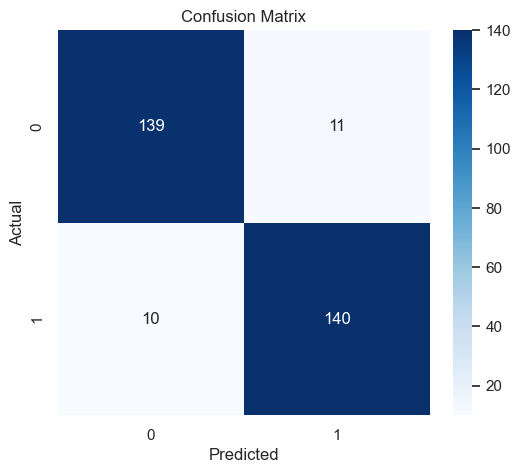

In [7]:
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


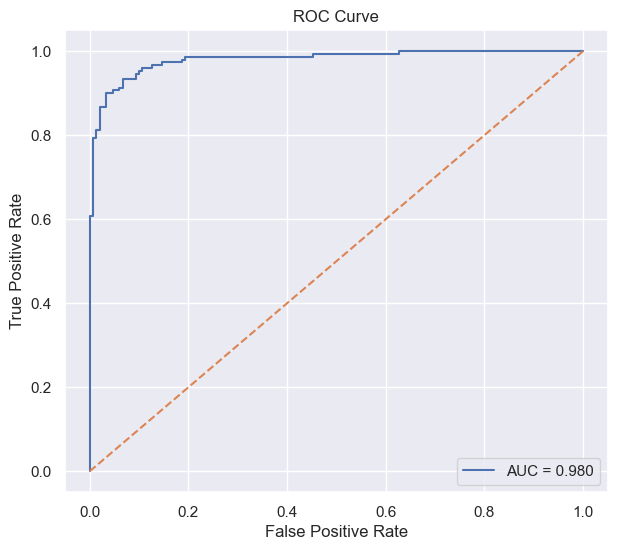

In [19]:
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# ✔ Overfitting & Underfitting

### Overfitting
- Model memorizes training data.
- Low training error
- High test error
- Example: Very deep decision trees

### Underfitting
- Model is too simple
- High training error
- Example: A linear model for non-linear data

### Best Model:
- Low training error
- Low test error
- Good generalization


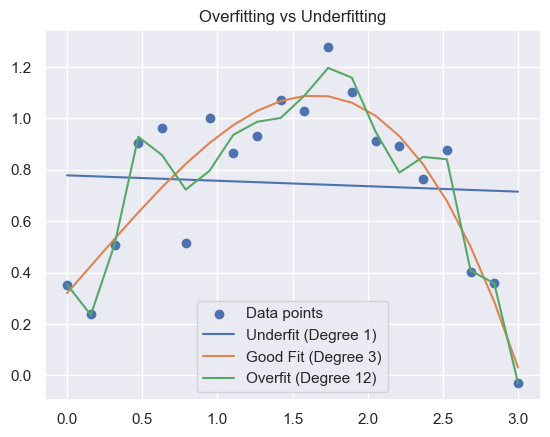

In [20]:
# Create a simple curve dataset (FOR VISUALIZATION ONLY)
np.random.seed(0)
x_curve = np.linspace(0, 3, 20)
y_curve = np.sin(x_curve) + np.random.normal(0, 0.2, 20)

plt.scatter(x_curve, y_curve, label="Data points")

# Underfitting: straight line
coef = np.polyfit(x_curve, y_curve, 1)
plt.plot(x_curve, np.poly1d(coef)(x_curve), label="Underfit (Degree 1)")

# Good fit
coef = np.polyfit(x_curve, y_curve, 3)
plt.plot(x_curve, np.poly1d(coef)(x_curve), label="Good Fit (Degree 3)")

# Overfitting: high-degree model
coef = np.polyfit(x_curve, y_curve, 12)
plt.plot(x_curve, np.poly1d(coef)(x_curve), label="Overfit (Degree 12)")

plt.legend()
plt.title("Overfitting vs Underfitting")
plt.show()


# ✔ Regularization (L1 & L2)

Regularization helps reduce **overfitting**.

---

## 🔹 L1 Regularization (Lasso)
- Adds penalty: absolute value of coefficients:  
  `λ * |w|`
- Can shrink weights to **zero** → feature selection.

---

## 🔹 L2 Regularization (Ridge)
- Adds penalty: square of coefficients:  
  `λ * w^2`
- Shrinks weights, but does NOT make them exactly zero.
- More stable.

---

## Used in:
- Logistic Regression
- Linear Regression
- SVM
- Neural Networks


In [21]:
# L1 Regularized logistic regression
clf_l1 = LogisticRegression(penalty='l1', solver='liblinear')
clf_l1.fit(X, y)

# L2 Regularized logistic regression
clf_l2 = LogisticRegression(penalty='l2')
clf_l2.fit(X, y)

print("L1 Coefficients:\n", clf_l1.coef_)
print("\nL2 Coefficients:\n", clf_l2.coef_)


L1 Coefficients:
 [[0.51945667 3.80800489]]

L2 Coefficients:
 [[0.67616134 3.39366599]]
